# Figure 1: Spectator conditioned phase distributions

In [1]:
# import general packages
import numpy as np
import os
import dill as pickle
pickle.settings['recurse'] = True

# Matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gspec #import GridSpec
from matplotlib import transforms
from matplotlib.gridspec import GridSpec
from matplotlib import colors as mcolors
from matplotlib.ticker import MaxNLocator
from matplotlib.patches import FancyArrowPatch

# Import functions
%matplotlib inline

## Plotting Params

In [7]:
axes_color =  '0.8'

plt.rcParams.update({'font.size': 9,
                     'font.family': 'sans-serif',
                     'font.sans-serif' : 'Helvetica',
                     'font.style':'normal',
                     'axes.grid' : False,
                     'axes.edgecolor': axes_color,
                     'ytick.color': '.15',
                     'xtick.color':'.15',
                     'lines.linewidth':1,
                    })

ytick_major_size = 3.5
plt.rcParams['ytick.major.size'] = ytick_major_size
plt.rcParams['ytick.major.width'] = 0.8

xtick_major_size = 3.5
plt.rcParams['xtick.major.size'] = xtick_major_size
plt.rcParams['xtick.major.width'] = 0.8
plt.rcParams['lines.markersize'] = 3

plt.rcParams['errorbar.capsize'] = 1.5
plt.rcParams['lines.markeredgewidth'] = 0.5


linewidth_default = plt.rcParams['lines.linewidth']
markersize_default = plt.rcParams['lines.markersize']
elinewidht_default = plt.rcParams['lines.markeredgewidth']
capsize_default = plt.rcParams['errorbar.capsize']
markeredgewidth_default = plt.rcParams['lines.markeredgewidth']

# Load .pkl data

In [8]:
FolderPath = os.getcwd()
print('If Fig1_data.pkl cannot be found, please download it from the 4TU server on which all paper figure data is stored.')
DataName = 'Fig1_data.pkl'
DataSavePath = os.path.join(FolderPath,DataName)

DataContainingFile = open(DataSavePath, 'rb')
Spectator_Dict = pickle.load(DataContainingFile, encoding = 'latin1')
DataContainingFile.close()

Spectator_Data_Dict = Spectator_Dict['Data']
Spectator_MetaData_Dict = Spectator_Dict['MetaData']

If Fig1_data.pkl cannot be found, please download it from the 4TU server on which all paper figure data is stored.


# Generate the figure

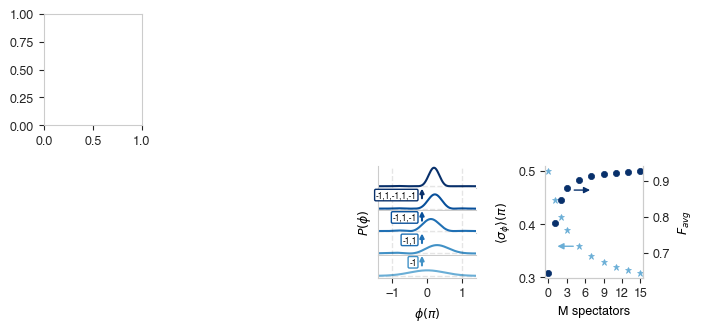

In [9]:
fig_multiplier = 1
fig = plt.figure(figsize = [18.3/2.54*1*fig_multiplier,8.9/2.54*fig_multiplier])#,constrained_layout=True)

gs = GridSpec(2, 4, figure=fig)#, hspace = 0.1, wspace = 0.1)
ax1 = fig.add_subplot(gs[1,3])

N_spectators = Spectator_MetaData_Dict['N_spectators']
N_spectators_list = Spectator_MetaData_Dict['N_spectators_list']

N_spec_max_1c = 5
N_spectators_list_1c = N_spectators_list[: N_spectators_list.index(N_spec_max_1c)+1]
N_spectators_1c = len(N_spectators_list_1c)
Spectator_Data_Dict_1c = {}
for key, N_spectators_1c in enumerate(N_spectators_list_1c):
    Spectator_Data_Dict_1c[N_spectators_1c] = Spectator_Data_Dict[N_spectators_1c]


gs0 = gspec.GridSpecFromSubplotSpec(N_spectators_1c, 1, subplot_spec = gs[1,2], hspace = 0.01)
ax_dict = {}
for spectator_idx in range(N_spectators_1c):
    subplot_nr = N_spectators_1c - 1 - spectator_idx
    if subplot_nr == N_spectators_1c - 1:
        ax_dict[subplot_nr] = fig.add_subplot(gs0[spectator_idx,:])
    else:
        ax_dict[subplot_nr] = fig.add_subplot(gs0[spectator_idx,:], sharex = ax_dict[N_spectators_1c-1])
    
colors = cm.Blues(np.linspace(0.5,1,N_spectators_1c))
# colors = cm.Oranges(np.linspace(0.5,1,N_spectators))
max_phase_val = np.zeros(len(Spectator_Data_Dict_1c.keys()))
for cntr, key in enumerate(Spectator_Data_Dict_1c.keys()):
    Syndrome = [(-1)**N for N in range(key)]
    phases = Spectator_Data_Dict_1c[key][str(Syndrome)]['phases']
    phase_dist = Spectator_Data_Dict_1c[key][str(Syndrome)]['phase_dist']
    
    max_phase_val[cntr] = np.max( phase_dist )

max_phase_val_arr = max_phase_val
max_phase_val = np.max(max_phase_val)

for cntr, key in enumerate(Spectator_Data_Dict_1c.keys()):
    Syndrome = [(-1)**N for N in range(key)]
    phases = Spectator_Data_Dict_1c[key][str(Syndrome)]['phases']
    phase_dist = Spectator_Data_Dict_1c[key][str(Syndrome)]['phase_dist']

    ax0 = ax_dict[cntr] #ax0_list[cntr]
    ax0.axhline(y = 0, linestyle = '--', color = 'k', alpha = 0.1)
    ax0.plot(phases/np.pi, phase_dist, label = f"M = {str(key)}", color = colors[cntr], linewidth = 1.5*linewidth_default)
    ax0.axvline(x=-1, linestyle = '--', color = 'k', alpha = 0.1)
    ax0.axvline(x=1, linestyle = '--', color = 'k', alpha = 0.1)
    # ax0.legend(fontsize = 4.5, loc = 2, framealpha = 1, facecolor = 'w')
    ax0.set_xlim([-1.4,1.4])
    ax0.set_ylim([-0.1*max_phase_val,1.1*max_phase_val])
    ax0.set_yticks([])

    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)

    if cntr == 0:
        ax0.set_xlabel(r'$\phi (\pi)$')
    else:
        plt.setp( ax0.get_xticklabels(), visible=False)
        ax0.tick_params(bottom=False)

    # Annotate arrows between different phase distributions
    if cntr != 0:# len(ax_dict)-1:
        ax_arrow = ax_dict[cntr-1]
        # Define start and end points for the arrow (adjust x, y accordingly)
        start_xy = (-0.15, 0.35)  # Midpoint of lower plot
        end_xy = (-0.15, 0.2 + 1 * max_phase_val)   # Lower part of upper plot
        
        # Create a curved arrow
        arrow = FancyArrowPatch(
            start_xy, end_xy, transform=ax_arrow.transData,
            connectionstyle="arc3,rad=-0.0",  # Curve radius
            arrowstyle="-|>", color=colors[cntr], linewidth=1.5, mutation_scale = 6
        )
        ax_arrow.add_patch(arrow)  # Add arrow to subplot

        # Add annotation text next to the arrow
        syndrome = ",".join("-1" if i % 2 == 0 else "1" for i in range(key))
        ax_arrow.annotate(
            syndrome,  # Text
            xy=start_xy, xytext=(start_xy[0]-0.15, 0.6 * max_phase_val),  # Position
            textcoords="data", ha="right", fontsize=2*markersize_default,
            bbox=dict(boxstyle="round,pad=0.15", edgecolor=colors[cntr], facecolor="white")
        )


ax_dict[int((N_spectators_1c-1)/2)].set_ylabel(r'$P(\phi)$')


std_list = [Spectator_Data_Dict[key]['Avg_phase_std']/np.pi for key in Spectator_Data_Dict.keys()]
ln_sigma = ax1.plot(N_spectators_list, std_list, '*', color = colors[0], markersize = 1.5*markersize_default, label = r'$\langle \sigma_\phi \rangle(\pi)$') #, markersize = 15)
ax1.set_xlim([-0.5,np.max(N_spectators_list)+0.5])
ax1.set_xlabel('M spectators')
ax1.set_ylabel(r'$\langle \sigma_\phi \rangle(\pi)$') 
ax1.spines['top'].set_visible(False)


fid_list = [0.5+0.5*Spectator_Data_Dict[key]['Avg_BVL'] for key in Spectator_Data_Dict.keys()]
# infid_list = (np.array(fid_list) - np.ones(len(fid_list)))*-2
ax_fid = ax1.twinx()
ln_fid = ax_fid.plot(N_spectators_list, fid_list, 'o', color = colors[-1], markersize = 1.5*markersize_default, label = r'$F_{avg}$')
ax_fid.set_ylabel(r'$F_{avg}$')
ax_fid.spines['top'].set_visible(False)

# lns = ln_sigma+ln_fid
# labs = [l.get_label() for l in lns]
# ax1.legend(lns, labs, bbox_to_anchor=[0.4, 0.6], loc='center left', fontsize = 2.*markersize_default, framealpha = 1, facecolor = 'w')

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_xticks(np.arange(0, 16, 3))

ax_fid.annotate('', xy=(N_spectators_list[3]+4.25, fid_list[3]-0.005) ,
             xytext=(N_spectators_list[3]+0.75, fid_list[3]-0.005) ,
             arrowprops=dict(arrowstyle= '-|>', color=colors[-1],lw=1.)
           )
ax1.annotate('', xy=(N_spectators_list[4]-0.5, std_list[4]) ,
             xytext=(N_spectators_list[4]-4, std_list[4]) ,
             arrowprops=dict(arrowstyle= '<|-', color=colors[0],lw=1.)
           )


ax = fig.add_subplot(gs[0,0])



fig.tight_layout(pad = 1.5)

# FolderPath = r'...' 
# FigName = 'Fig1.pdf'
# FigSavePath = os.path.join(FolderPath,FigName)

# plt.savefig(FigSavePath, bbox_inches='tight')# , transparent=True)
